In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pathlib import Path

sns.set_theme(style="darkgrid")
df = pd.read_csv('blood_data (sorted).csv', sep=';')

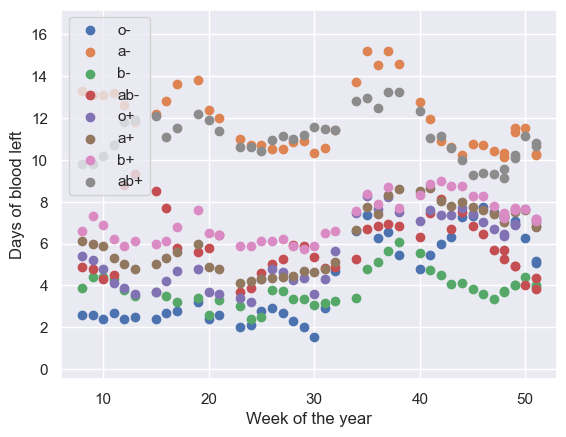

In [111]:
plt.xlabel("Week of the year")
plt.ylabel("Days of blood left")

x = df['week'].to_numpy()
y_max = 0
y_min = 100
for blood_group in ['o-', 'a-', 'b-', 'ab-', 'o+', 'a+', 'b+', 'ab+']:
    y = df[blood_group].to_numpy()

    plt.scatter(x, y, label=blood_group)

    if y_max < max(y):
        y_max = max(y)
    if y_min > min(y):
        y_min = min(y)

plt.xlim(min(x)-2, max(x)+2)
plt.ylim(y_min-2,y_max+2)
plt.legend(loc="upper left")

Path("./output/").mkdir(parents=True, exist_ok=True)
plt.savefig('./output/blood_data (sorted).png')

plt.show()

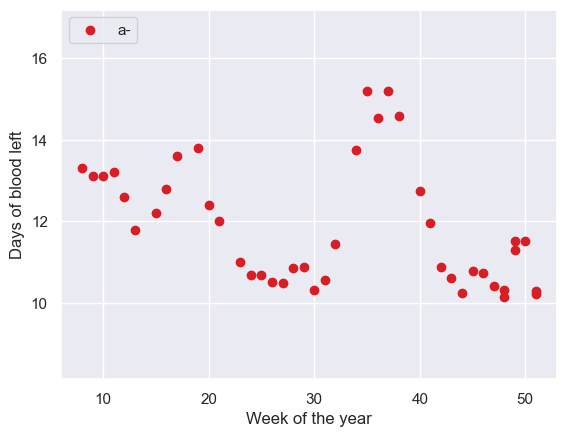

In [112]:
plt.xlabel("Week of the year")
plt.ylabel("Days of blood left")

x = df['week'].to_numpy()

blood_group = 'a-'

y = df[blood_group].to_numpy()

plt.scatter(x, y, label=blood_group, color='#D81E24')


plt.xlim(min(x)-2, max(x)+2)
plt.ylim(min(y)-2, max(y)+2)
plt.legend(loc="upper left")

Path("./output/").mkdir(parents=True, exist_ok=True)
plt.savefig('./output/blood_data (a-).png')

plt.show()

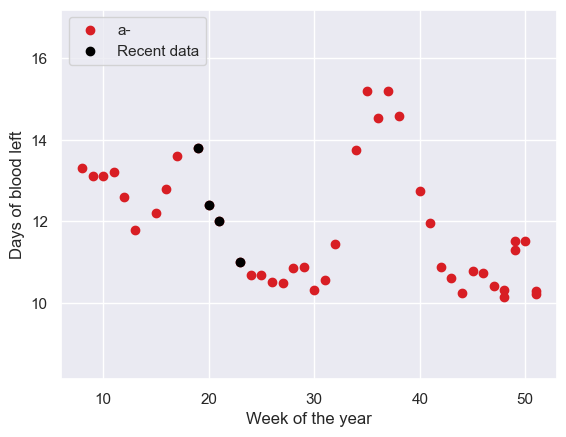

In [113]:
df = pd.read_csv('blood_data (sorted).csv', sep=';')

plt.xlabel("Week of the year")
plt.ylabel("Days of blood left")

x = df['week'].to_numpy()

blood_group = 'a-'

y = df[blood_group].to_numpy()

plt.scatter(x, y, label=blood_group, color='#D81E24')
start = 9
points = 4
for i in range(start, start+points):
    if i == start:
        plt.plot(x[i], y[i], color='black', linestyle='', marker='o', label='Recent data')
    else:
        plt.plot(x[i], y[i], color='black', marker='o')


plt.xlim(min(x)-2, max(x)+2)
plt.ylim(min(y)-2, max(y)+2)
plt.legend(loc="upper left")

Path("./output/").mkdir(parents=True, exist_ok=True)
plt.savefig('./output/blood_data (a-) dots marked.png')

plt.show()

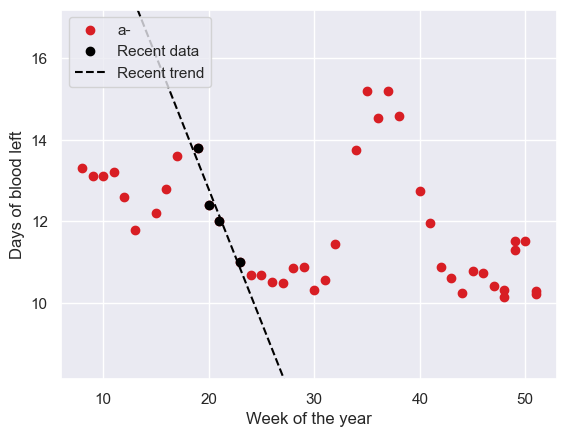

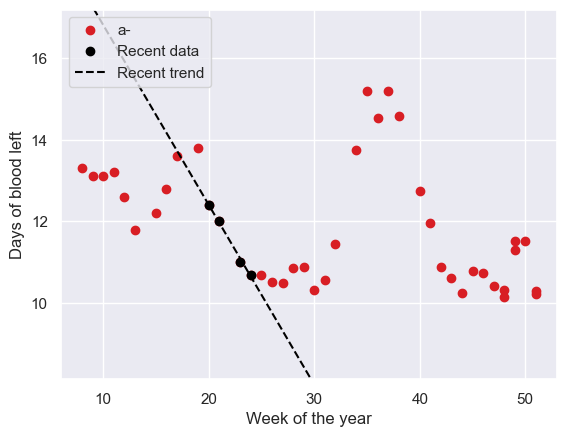

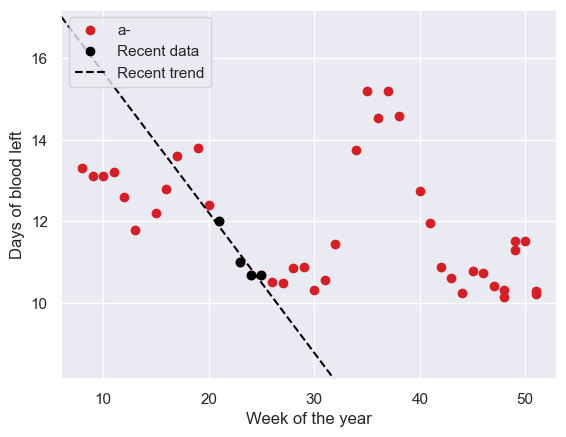

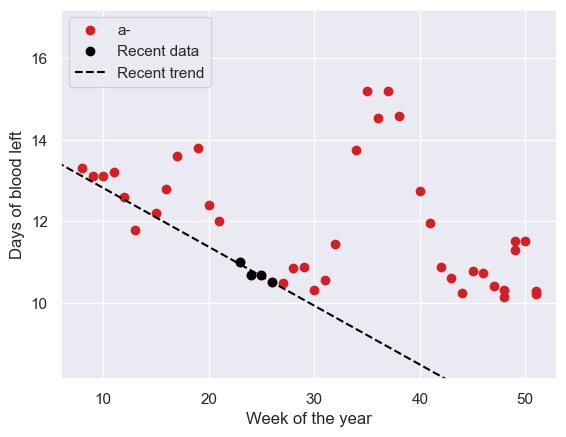

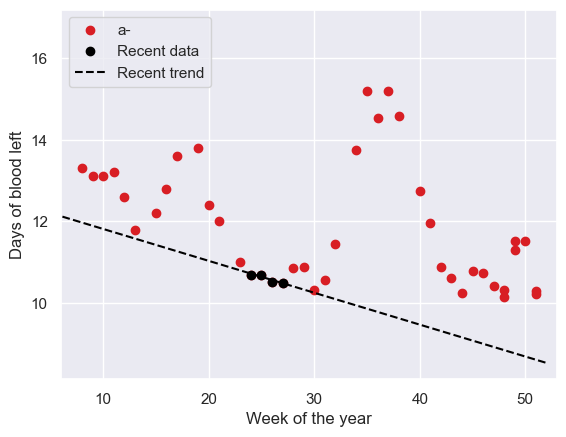

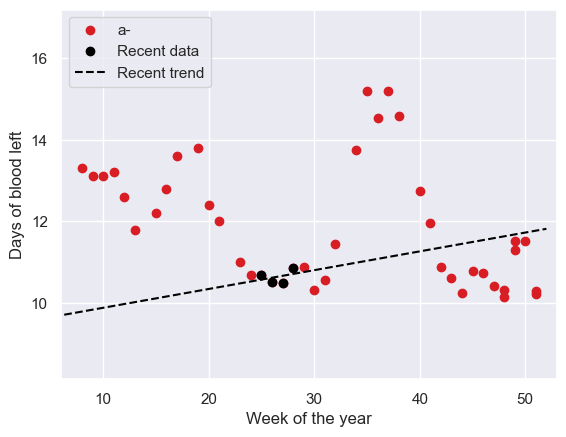

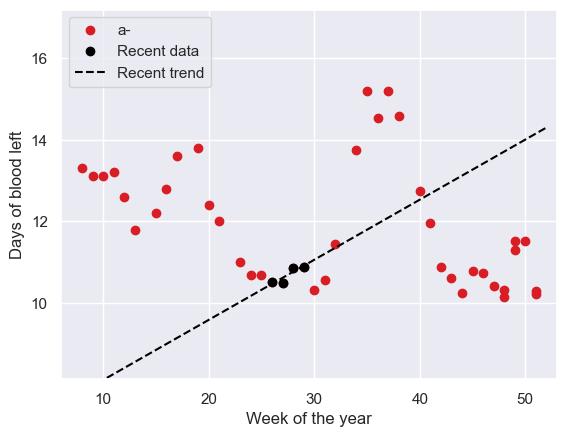

In [114]:
for j in range(7):
    plt.xlabel("Week of the year")
    plt.ylabel("Days of blood left")

    x = df['week'].to_numpy()

    blood_group = 'a-'

    y = df[blood_group].to_numpy()

    plt.scatter(x, y, label=blood_group, color='#D81E24')
    start = 9+j
    points = 4
    for i in range(start, start+points):
        if i == start:
            plt.plot(x[i], y[i], color='black', linestyle='', marker='o', label='Recent data')
        else:
            plt.plot(x[i], y[i], color='black', marker='o')

    model = LinearRegression(fit_intercept=True)

    x_t = x[start:start+points]
    y_t = y[start:start+points]
    model.fit(x_t[:, np.newaxis], y_t)

    xfit = np.linspace(0, 52, 1000)
    yfit = model.predict(xfit[:, np.newaxis])

    plt.plot(xfit, yfit, linestyle='--', color='black', label='Recent trend')


    plt.xlim(min(x)-2, max(x)+2)
    plt.ylim(min(y)-2, max(y)+2)
    plt.legend(loc="upper left")

    Path("./output/").mkdir(parents=True, exist_ok=True)
    plt.savefig(f'./output/blood_data (a-) trend {start}-{start+points}.png')

    plt.show()
